# Curso: Redes Neurais Convolucionais

Prof. [Denilson Alves Pereira](https://sites.google.com/ufla.br/denilsonpereira) <br>
Departamento de Ciência da Computação (DCC) <br>
Instituto de Ciências Exatas e Tecnológicas (ICET) <br> 
Universidade Federal de Lavras (UFLA)

# Atividade Prática 04

**Tempo estimado para execução**: 3 horas

## Projeto Final

O objetivo da atividade é desenvolver um projeto prático livre utilizando o conhecimento adquirido no curso. Você deve escolher um *dataset* para um problema envolvendo redes neurais convolucionais, ler e efetuar o pré-processamento desse conjunto de dados, configurar uma rede neural para efetuar o processamento ou carregar um modelo pré-treinado, e efetuar os pós-processamentos, se necessários. Avalie a predição no conjunto de teste. Você deve avaliar diversas configurações para a sua rede neural, de forma a obter um resultado satisfatório. Verifique na literatura os melhores resultados obtidos com o *dataset*, se você estiver usando um *dataset* público.

Para o *dataset*, escolha uma das opções abaixo:
- um dataset que você esteja trabalhando em um projeto pessoal ou da sua empresa;
- um dataset público.

Existem diversos *datasets* públicos disponíveis na Web. A plataforma *Kaggle* (https://www.kaggle.com/) é uma das principais fontes. A *Kaggle* é formada por uma comunidade *online* de cientistas de dados e programadores em *machine learning*. Os usuários podem encontrar *datasets* e códigos em Python que os utilizam. Também podem participar de competições, fazendo parte de equipes, para resolver desafios da ciência de dados, inclusive com possibilidades de premiações em dinheiro.

Este link (https://enoumen.com/2021/04/23/data-sciences-datasets-data-visualization-data-analytics-big-data-data-lakes/#Image_Processing_Dataset) também apresenta *datasets* públicos que pode ser úteis para execução da atividade prática. 

#### Importante:
Documente cada etapa do seu código. Crie céluas de *Markdown* com textos explicativos e links para referências. Adicione comentários ao seu código.

## Descrição do projeto

Meu projeto prático se trata do uso de uma rede neural convolucional para classificação de doenças em folhas de café.
Essas doenças são: Miner (Bicho mineiro), Rust (Ferrugem), Phoma.


O [dataset utilizado](https://www.kaggle.com/badasstechie/coffee-leaf-diseases) Contém as seguintes informações:

1.   Imagens para treino.
2.   Máscaras para treino.
3.   Imagens para teste.
4.   Máscaras para teste.
5.   test_classes.csv (*Contém as classes de teste*).
6.   train_classes.csv (*Contém as classes de treino*).
7.   mask_colors.csv (*Anotações sobre os valores RGB de cada classe*).

Os arquivos *csv* de treino e teste estão organizados da seguinte 
maneira, a primeira coluna contém o *id*, que basicamente o titulo da imagem, a segunda representa a doença "Miner", a terceira o "Rust" e a quarta a "Phoma", essas colunas que representam as imagens podem conter 0 ou 1, sendo que o 1 representa que aquela imagem possui a doença e 0 que não possui a enfermidade. Uma imagem só pode ter uma doença.

## Importação das bibliotecas

In [ ]:
import numpy as np
import tensorflow as tf 
from tensorflow import keras 
from keras_preprocessing.image import ImageDataGenerator, load_img  
import pandas as pd # structured data
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split  
import random  

from PIL import Image

## Leitura das classes de teste e treino

Descomprimindo o arquivo .zip contendo o dataset

In [6]:
!unzip dataset.zip

unzip:  cannot find or open dataset.zip, dataset.zip.zip or dataset.zip.ZIP.


Setando as dimensões originais das imagens e quantidade de canais.

In [7]:
LARGURA = 2048
ALTURA = 1024
TAMANHO = (ALTURA,LARGURA)
CANAIS = 3

Leitura dos arquivos de treino e teste contendo as classes.

In [8]:
classes_treino = pd.read_csv("./dataset/train_classes.csv")
classes_teste = pd.read_csv("./dataset/test_classes.csv")

FileNotFoundError: [Errno 2] No such file or directory: './dataset/train_classes.csv'

Imprimindo as 20 primeiras linhas das classes de treino.

In [ ]:
classes_treino.head(20)

,id,miner,rust,phoma
0,0,0,0,0
1,1,0,0,0
2,2,0,0,0
3,3,0,0,0
4,4,0,0,0
5,5,0,0,0
6,6,0,0,0
7,7,0,0,0
8,8,0,0,0
9,9,0,0,0


Imprimindo as 20 últimas linhas das classes de treino.

In [ ]:
classes_treino.tail(20)

,id,miner,rust,phoma
1244,1580,0,1,0
1245,1581,0,1,0
1246,1582,0,1,0
1247,1583,0,1,0
1248,1584,0,0,0
1249,1585,0,0,0
1250,1586,0,0,0
1251,1587,0,0,0
1252,1588,0,1,0
1253,1589,0,1,0


Imprimindo as 20 primeiras linhas das classes de teste.

In [ ]:
classes_teste.head(20)

,id,miner,rust,phoma
0,64,1,0,0
1,65,1,0,0
2,66,1,0,0
3,67,1,0,0
4,68,1,0,0
5,69,1,0,0
6,70,1,0,0
7,71,1,0,0
8,72,1,0,0
9,73,1,0,0


Imprimindo as 20 últimas linhas das classes de treino.

In [ ]:
classes_teste.tail(20)

,id,miner,rust,phoma
380,1644,0,1,0
381,1645,0,1,0
382,1646,0,1,0
383,1647,0,1,0
384,1648,0,1,0
385,1649,0,1,0
386,1650,0,1,0
387,1651,0,1,0
388,1652,0,1,0
389,1653,0,1,0


## Ajuste das classes


---


Decidi reajustar a tabela das classes para a seguinte configuração,
A primeira coluna vai representar o nome com a extensão da imagem, enquanto que a segunda representará apenas a doença, onde coloquei a tradução dos nomes e adicionei mais uma classe a "Saudavel" que irá representar uma folha que não possui nenhuma das três doenças.
 



> **Exemplo:** Se a uma linha da tabela contém o valor 1 na coluna "rust", então na nova tabela aquela imagem terá em sua coluna “Doenca” o dado "Ferrugem”.


Realizei essa mudança pois acredito que isso não irá interferir negativamente no desenvolvimento da rede e facilitará a manipulação dos dados.

Ajustando a classe de treino

In [ ]:
nome_imagem = []
categoria = []
for linha in classes_treino.index:
    #print ("linha: " + str(linha) + " nomeImagem: " + str(classes_treino["id"][linha]))
    nome_imagem.append(str(classes_treino["id"][linha]) + '.jpg')
    if (classes_treino["miner"][linha] == 1):
        categoria.append("Bicho mineiro")
    elif (classes_treino["rust"][linha] == 1):
        categoria.append("Ferrugem")
    elif (classes_treino["phoma"][linha] == 1):
        categoria.append("Phoma")
    else:
        categoria.append("Saudavel")

df_treino = pd.DataFrame(
    {
        'imagens': nome_imagem,
        'categoria': categoria
    }
    )

Breve visualização da nova tabela

In [ ]:
df_treino.head(20)

,imagens,categoria
0,0.jpg,Saudavel
1,1.jpg,Saudavel
2,2.jpg,Saudavel
3,3.jpg,Saudavel
4,4.jpg,Saudavel
5,5.jpg,Saudavel
6,6.jpg,Saudavel
7,7.jpg,Saudavel
8,8.jpg,Saudavel
9,9.jpg,Saudavel


Ajustando a classe de teste

In [ ]:
nome_imagem = []
categoria = []
for linha in classes_teste.index:
    #print ("linha: " + str(linha) + " nomeImagem: " + str(classes_teste["id"][linha]))
    nome_imagem.append(str(classes_teste["id"][linha]) + '.jpg')
    if (classes_teste["miner"][linha] == 1):
        categoria.append("Bicho mineiro")
    elif (classes_teste["rust"][linha] == 1):
        categoria.append("Ferrugem")
    elif (classes_teste["phoma"][linha] == 1):
        categoria.append("Phoma")
    else:
        categoria.append("Saudavel")

df_teste = pd.DataFrame(
    {
        'imagens': nome_imagem,
        'categoria': categoria
    }
    )

Breve visualização da nova tabela de teste

In [ ]:
df_teste.head()

## Redimencionando as imagens

As imagens originais possuem uma largura de 2048 e uma altura de 1024, achei que este tamanho fosse grande para a rede então diminui para 1/4 deste tamanho ou seja 512 de largura e 256 de altura.

Definindo os novos tamanhos

In [ ]:
NALTURA = int(ALTURA/4)
NLARGURA = int(LARGURA/4)
TAMANHO = ( NALTURA,NLARGURA)

Execute a célula a baixo caso esteja executando o notebook por uma segunda vez e queira utilizar dimenções diferentes para as novas imagens.

In [ ]:
!rm -rf dataset/imagensResize/

Definindo e criando os novos diretórios

In [ ]:
diretorio_img_treino = './dataset/coffee-leaf-diseases/train/images/'
diretorio_img_teste = './dataset/coffee-leaf-diseases/test/images/'

In [ ]:
diretorio = "./dataset/imagensResize/"
!mkdir {diretorio}
novoDiretorioTreino = diretorio + "train/"
novoDiretorioTeste = diretorio + "test/"
!mkdir {novoDiretorioTreino}
!mkdir {novoDiretorioTeste}

mkdir: cannot create directory ‘./dataset/imagensResize/’: File exists
mkdir: cannot create directory ‘./dataset/imagensResize/train/’: File exists
mkdir: cannot create directory ‘./dataset/imagensResize/test/’: File exists


Reajustando as dimenções das imagens de treino e salvando em um novo diretório.

In [ ]:
for linha in df_treino.index:
  #print (df_treino['imagens'][linha])
  Image.open(diretorio_img_treino + df_treino['imagens'][linha]).resize((NLARGURA,NALTURA)).save(novoDiretorioTreino + df_treino['imagens'][linha])

Reajustando as dimenções das imagens de teste e salvando em um novo diretório.

In [ ]:
for linha in df_teste.index:
  #print (df_treino['imagens'][linha])
  Image.open(diretorio_img_teste + df_teste['imagens'][linha]).resize((NLARGURA,NALTURA)).save(novoDiretorioTeste + df_teste['imagens'][linha])

## Data augmentation

Defindo quais serão as variações aplicadas as imagens geradas no data augmentation.

In [ ]:
batch_size = 20
train_datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range = 15,
    rescale = 1./255,
    shear_range = 0.1,
    zoom_range = 0.2,
    width_shift_range = 0.1,
    height_shift_range = 0.1
)


Aumentando os dados de treino.

In [ ]:
train_generator = train_datagen.flow_from_dataframe(
    df_treino,
    novoDiretorioTreino,
    x_col = "imagens",
    y_col = "categoria",
    target_size = TAMANHO,
    class_mode = 'categorical',
    batch_size = batch_size,
    color_mode="rgb"
)

Found 1264 validated image filenames belonging to 4 classes.


Aumentando os dados de teste.

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_dataframe(
    df_teste,
    novoDiretorioTeste,
    x_col = "imagens",
    y_col = "categoria",
    target_size = TAMANHO,
    class_mode = 'categorical',
    batch_size = batch_size,
    color_mode="rgb"
)

Found 400 validated image filenames belonging to 4 classes.


Criando um pequeno dataframe apenas para a vizualização das imagens que serão geradas.

In [ ]:
df_example = df_treino.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    df_example, 
    novoDiretorioTreino, 
    x_col='imagens',
    y_col='categoria',
    target_size=TAMANHO,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


Imprimindo as imagens que forão geradas

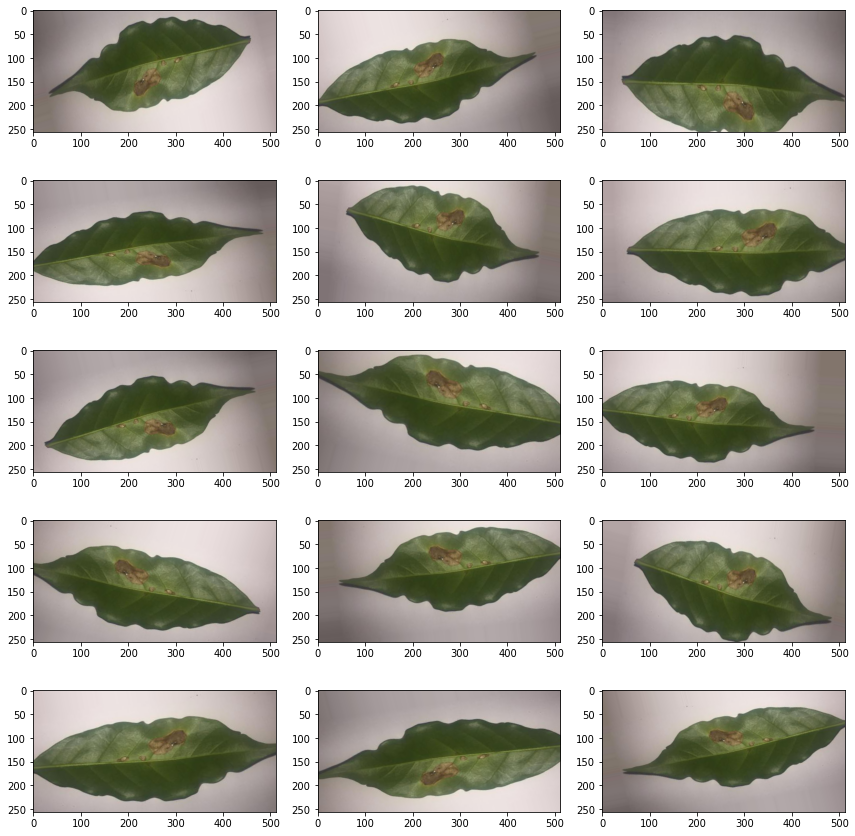

In [ ]:
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

# Definição do modelo

In [36]:

inputs = keras.Input(shape = (NALTURA, NLARGURA, CANAIS))

x = keras.layers.Conv2D(filters=8, kernel_size=(5,5), padding='valid', strides=(1,1), activation ='relu')(inputs)
x = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = keras.layers.Conv2D(filters=16, kernel_size=(5,5), padding='valid', strides=(1,1), activation ='relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = keras.layers.Conv2D(filters=32, kernel_size=(5,5), padding='valid', strides=(1,1), activation ='relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = keras.layers.Conv2D(filters=64, kernel_size=(5,5), padding='valid', strides=(1,1), activation ='relu')(x)
x = keras.layers.MaxPool2D(pool_size=(2,2), strides=(2,2))(x)

x = keras.layers.Flatten()(x)

x = keras.layers.Dense(units=128, activation="relu")(x)
x = keras.layers.Dense(units=64, activation="relu")(x)

outputs = keras.layers.Dense(units=4, activation="softmax")(x)

model = keras.Model(inputs=inputs, outputs=outputs)

model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 256, 512, 3)]     0         
                                                                 
 conv2d (Conv2D)             (None, 252, 508, 8)       608       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 126, 254, 8)      0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 250, 16)      3216      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 61, 125, 16)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 57, 121, 32)       12832 

Compilando o modelo

In [37]:
model.compile(optimizer="rmsprop", loss="categorical_crossentropy", metrics=["accuracy"])

Treinando a rede

In [38]:
history = model.fit(train_generator, epochs=17)

Epoch 1/17
64/64 [==============================] - 216s 3s/step - loss: 1.6077 - accuracy: 0.3117
Epoch 2/17
64/64 [==============================] - 218s 3s/step - loss: 1.3860 - accuracy: 0.3718
Epoch 3/17
64/64 [==============================] - 210s 3s/step - loss: 1.3126 - accuracy: 0.4312
Epoch 4/17
64/64 [==============================] - 214s 3s/step - loss: 1.1778 - accuracy: 0.4312
Epoch 5/17
64/64 [==============================] - 212s 3s/step - loss: 1.0788 - accuracy: 0.5000
Epoch 6/17
64/64 [==============================] - 213s 3s/step - loss: 1.0291 - accuracy: 0.5427
Epoch 7/17
64/64 [==============================] - 218s 3s/step - loss: 0.9557 - accuracy: 0.5910
Epoch 8/17
64/64 [==============================] - 212s 3s/step - loss: 0.7972 - accuracy: 0.6677
Epoch 9/17
64/64 [==============================] - 213s 3s/step - loss: 0.7575 - accuracy: 0.7097
Epoch 10/17
64/64 [==============================] - 214s 3s/step - loss: 0.7622 - accuracy: 0.7263
Epoch 11/

## Avaliação do modelo

Na execução da célula abaixo podemos verificar o nivel de acurácia do modelo

In [39]:
loss, acc = model.evaluate(test_generator)
print("Loss: %.4f" % loss, "\nAccuracy: %.4f" % acc)

20/20 [==============================] - 16s 775ms/step - loss: 0.2797 - accuracy: 0.9050
Loss: 0.2797 
Accuracy: 0.9050


## Considerações finais

O dataset possui máscaras que não consegui estudar a tempo como utilizá lo no modelo, acredito que se tivesse utilizado elas o modelo teria uma melhor acurácia.

Quero agradecer ao professor por ter disponibilizado seu tempo para ministrar esse curso. No primeiro curso já foi uma ótima introdução às redes neurais, hoje em dia estou estudando de maneira autônoma a arquitetura LSTM e estou muito empolgado com os resultados, e o curso de introdução ministrado pelo senhor foi de extrema importância para meus estudos sobre esse assunto.

## Referências

Conteúdo disponibilizado no campus virtual da disciplina.

https://nanonets.com/blog/data-augmentation-how-to-use-deep-learning-when-you-have-limited-data-part-2/

https://towardsdatascience.com/r-cnn-fast-r-cnn-faster-r-cnn-yolo-object-detection-algorithms-36d53571365e

https://www.liveai.eu/workshop/learning-ai-visually-with-cnn-explainer/


